In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

In [2]:
LiquorData = pd.read_csv("Liquor_Licenses.csv")

In [3]:
# remove null columns in case of errors as well as removing areas without any location1 data
# not necessary because so commenting out. no missing values
#LiquorData.dropna(subset=['Location 1'], inplace = True) 

# split based on first instance of (3 in order to eventually remove the address and leave only longitude and latitude
# had to include 3 because this otherwise splits based on first instance of '(' which is problematic if address has '('
newLoc = LiquorData['Location 1'].str.split("\(3", n = 1, expand = True) 

longLat= newLoc[1]

#remove the parentheses in the end
longLat = longLat.str[:-1]

#add back the 3's to the beginning
longLat = '3' + longLat


#set location to the newly manipulated data so empty long/lat can be removed
LiquorData['Location']=longLat

#remove any locations without a liquor license
LiquorData.dropna(subset=['Location'], inplace = True) 

#now split into long and lat
splitLL = LiquorData['Location'].str.split(",", n = 1, expand = True)

#now adds the newly created long and lat columns back to the data frame
LiquorData['longitude']=splitLL[1]
LiquorData['latitude']=splitLL[0]

# Dropping old Location 1 and Location columns which had extra garbage in them
LiquorData.drop(columns =['Location 1'], inplace = True)
LiquorData.drop(columns =['Location'], inplace = True) 


In [4]:
isRecent = LiquorData['LicenseYear'] >= 2017 # we only care about recent licenses
LiquorData = LiquorData[isRecent]

In [5]:
# now that the data is down to a more reasonable size, we can plot it to look for possible arrangements of clusters
# first, cast the coordinates as numeric columns
LiquorData['longitude'] = pd.to_numeric(LiquorData['longitude'])
LiquorData['latitude'] = pd.to_numeric(LiquorData['latitude'])
# now plot
LiquorData.plot.scatter(x='longitude', y='latitude')

In [6]:
XY = {'long': LiquorData['longitude'], 'lat': LiquorData['latitude']}
XY = pd.DataFrame(data=XY)

In [7]:
matrix = XY.values
# Using sklearn
km = KMeans(n_clusters=5)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([XY.index,labels]).T

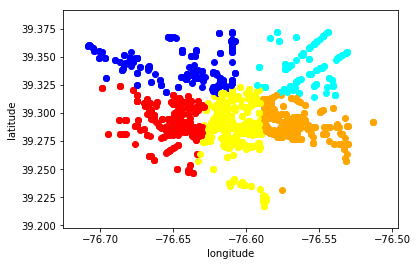

In [8]:
colors = ['red', 'yellow', 'blue', 'orange', 'cyan', 'purple', 'pink']
plt =LiquorData.plot.scatter(x='longitude', y='latitude', color='white')
for index, row in results.iterrows():
    plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[row[1]])

### Looks interesting. With 5 clusters, the centers appear to be arranged in the middle of the city, North, Northeast, Southeast, and South of the city's center. Let's see if we make more clusters without overfitting.

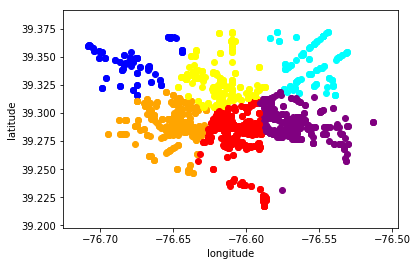

In [9]:
# Using sklearn
km = KMeans(n_clusters=6)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([XY.index,labels]).T

plt =LiquorData.plot.scatter(x='longitude', y='latitude', color='white')
for index, row in results.iterrows():
    plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[row[1]])

### Looks a little better. We'll try one more

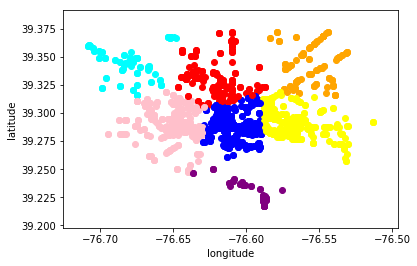

In [10]:
# Using sklearn
km = KMeans(n_clusters=7)
km.fit(matrix)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([XY.index,labels]).T

plt =LiquorData.plot.scatter(x='longitude', y='latitude', color='white')
for index, row in results.iterrows():
    plt.plot(XY.iloc[index]['long'], XY.iloc[index]['lat'], "or", color=colors[row[1]])

### If 7 clusters looks satisfactory, let's examine the cluster centers so they can be compared to the ones from emergency call data later on.

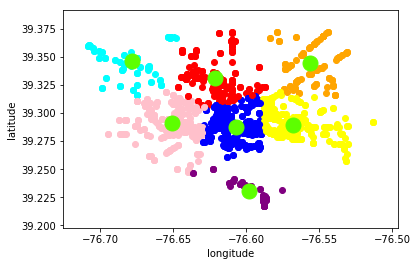

In [11]:
centers = km.cluster_centers_
for center in centers:
    plt.plot(center[0], center[1], "or", color='#5dff00', markersize=15)
plt.figure

In [12]:
long = XY['long']
lat = XY['lat']
max(long)

-76.51312

In [13]:
min(long)

-76.70824300000001

In [14]:
max(lat)

39.372187

In [15]:
min(lat)

39.216978999999995

In [16]:
#Print results of clustering to get some idea of how many member per cluster 
results[1].value_counts()

2    910
1    437
6    319
0    304
3    132
4    105
5     57
Name: 1, dtype: int64

In [17]:
#this is also to provide some numeric context about the cluster centers.
print(centers)

[[-76.62130237  39.33107283]
 [-76.56798641  39.28907983]
 [-76.60725683  39.28720914]
 [-76.55599485  39.34422831]
 [-76.67837763  39.34640312]
 [-76.5977656   39.23092498]
 [-76.65104099  39.29083946]]
